
## Using NIFTY50 Dataset
### Name : Nayan Deep
### Branch : Computer Science

### Aim: To find the how stocks of the TCS company behave on different days (statistical analysis on the stock prices of TCS company data)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

We first load the dataset for the case study on the random process. We use the publicly accessible NIFTY-50 Stocks Dataset (https://www.kaggle.com/datasets/iamsouravbanerjee/nifty50-stocks-dataset) for this case study. The data from the NSE was used to construct this dataset.

From the full dataset, we select only stocks for the TCS company as sample and load it with help of pandas module

In [2]:
df = pd.read_csv("../Desktop/tcs.csv")

Display the first 5 rows from the datset using df.head()

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


Display the column names of the dataset

In [4]:
for col in df.columns:
    print(col)

Date
Symbol
Series
Prev Close
Open
High
Low
Last
Close
VWAP
Volume
Turnover
Trades
Deliverable Volume
%Deliverble


Display values of Open column

In [5]:
df['Open']

0       1198.70
1        992.00
2        982.40
3        969.90
4        986.50
         ...   
4134    3102.05
4135    3106.00
4136    3149.95
4137    3145.60
4138    3099.00
Name: Open, Length: 4139, dtype: float64

A general stastistical description of the dataset columns in a nutshell 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Prev Close,4139.0,1.693844e+03,7.228793e+02,3.666500e+02,1.106250e+03,1.633500e+03,2.326125e+03,3.603700e+03
Open,4139.0,1.695594e+03,7.229782e+02,3.600000e+02,1.105525e+03,1.625000e+03,2.321800e+03,3.625000e+03
High,4139.0,1.715882e+03,7.284501e+02,3.777500e+02,1.120275e+03,1.655000e+03,2.345000e+03,3.674800e+03
Low,4139.0,1.673586e+03,7.177802e+02,3.580000e+02,1.088575e+03,1.610000e+03,2.301300e+03,3.572550e+03
Last,4139.0,1.694310e+03,7.231779e+02,3.657000e+02,1.107000e+03,1.630050e+03,2.325000e+03,3.610750e+03
Close,4139.0,1.694372e+03,7.230610e+02,3.666500e+02,1.106500e+03,1.636350e+03,2.326850e+03,3.603700e+03
VWAP,4139.0,1.694618e+03,7.231442e+02,3.684000e+02,1.105750e+03,1.629420e+03,2.319895e+03,3.633110e+03
Volume,4139.0,1.676762e+06,1.607879e+06,1.834500e+04,7.884775e+05,1.227748e+06,2.081120e+06,4.403358e+07
Turnover,4139.0,2.952102e+14,3.849370e+14,1.370237e+12,1.050834e+14,1.824973e+14,3.455393e+14,1.268362e+16
Trades,2456.0,8.550271e+04,5.603149e+04,1.219000e+03,4.674950e+04,6.890100e+04,1.106302e+05,5.425410e+05


Defining the **Correlation matrix**

In [7]:
dfcorr = df.corr()
dfcorr

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Prev Close,1.000000,0.998782,0.998465,0.998480,0.998124,0.998135,0.998460,0.095107,0.419651,0.191815,0.093713,0.179415
Open,0.998782,1.000000,0.999578,0.999563,0.999189,0.999206,0.999527,0.094517,0.419111,0.190059,0.090569,0.177790
High,0.998465,0.999578,1.000000,0.999459,0.999623,0.999645,0.999801,0.100668,0.424433,0.200347,0.094585,0.173946
Low,0.998480,0.999563,0.999459,1.000000,0.999628,0.999651,0.999811,0.090022,0.415576,0.180134,0.086493,0.178865
Last,0.998124,0.999189,0.999623,0.999628,1.000000,0.999981,0.999859,0.095354,0.420035,0.190200,0.090091,0.175591
Close,0.998135,0.999206,0.999645,0.999651,0.999981,1.000000,0.999885,0.095337,0.420005,0.189980,0.090085,0.175683
VWAP,0.998460,0.999527,0.999801,0.999811,0.999859,0.999885,1.000000,0.095171,0.419924,0.190386,0.090017,0.175794
Volume,0.095107,0.094517,0.100668,0.090022,0.095354,0.095337,0.095171,1.000000,0.883537,0.812354,0.896491,-0.120727
Turnover,0.419651,0.419111,0.424433,0.415576,0.420035,0.420005,0.419924,0.883537,1.000000,0.768215,0.786355,-0.094231
Trades,0.191815,0.190059,0.200347,0.180134,0.190200,0.189980,0.190386,0.812354,0.768215,1.000000,0.633869,-0.347938


Plotting the **Correlation Matrix**

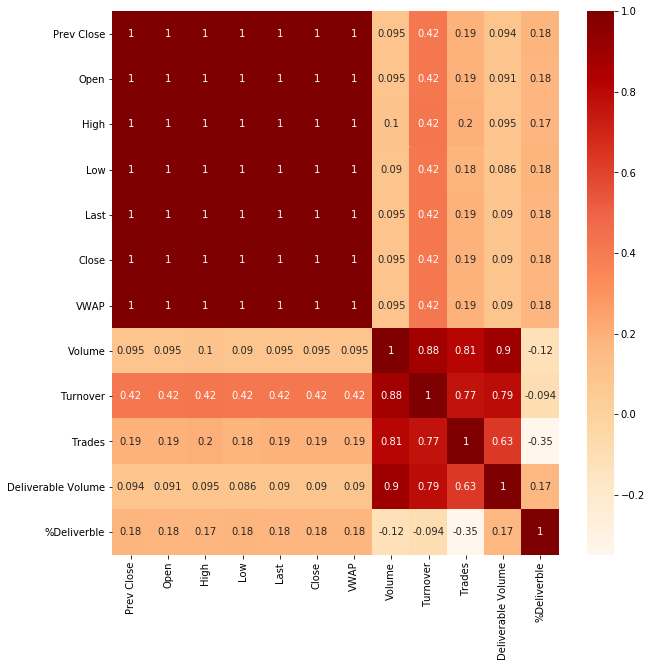

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap="OrRd", annot=True)

Dates when the company opened with top 3 opening price

In [9]:
df.nlargest(3,'Open')

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3414,2018-05-25,TCS,EQ,3603.70,3625.0,3674.80,3572.55,3589.90,3585.80,3633.11,1884886,6.848001e+14,142355.0,954659,0.5065
3415,2018-05-28,TCS,EQ,3585.80,3616.5,3616.50,3486.00,3499.35,3502.05,3516.38,1858399,6.534828e+14,142950.0,1041835,0.5606
3411,2018-05-22,TCS,EQ,3556.75,3558.0,3574.95,3493.70,3514.40,3508.90,3520.43,928708,3.269453e+14,71360.0,523307,0.5635


Display only the date column

In [10]:
df.nlargest(3,'Open')['Date']

3414    2018-05-25
3415    2018-05-28
3411    2018-05-22
Name: Date, dtype: object

In [11]:
print("The variance of opening prices is: ",df['Open'].var())
print("The standard deviation of opening prices is: ",df['Open'].std())

The variance of opening prices is:  522697.5186152657
The standard deviation of opening prices is:  722.9782283134574


Selecting observations for 100 days period using slicing

In [12]:
df_100 = df[0:100].copy()

Creating a new column that computes the mean of the highest and lowest stock prices.

In [13]:
df_100["Average"] = (df_100["High"]+df_100["Low"])/2

In [14]:
df_100.columns


Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Average'],
      dtype='object')

Now we plot the highest traded price of the stocks for 100 different days.

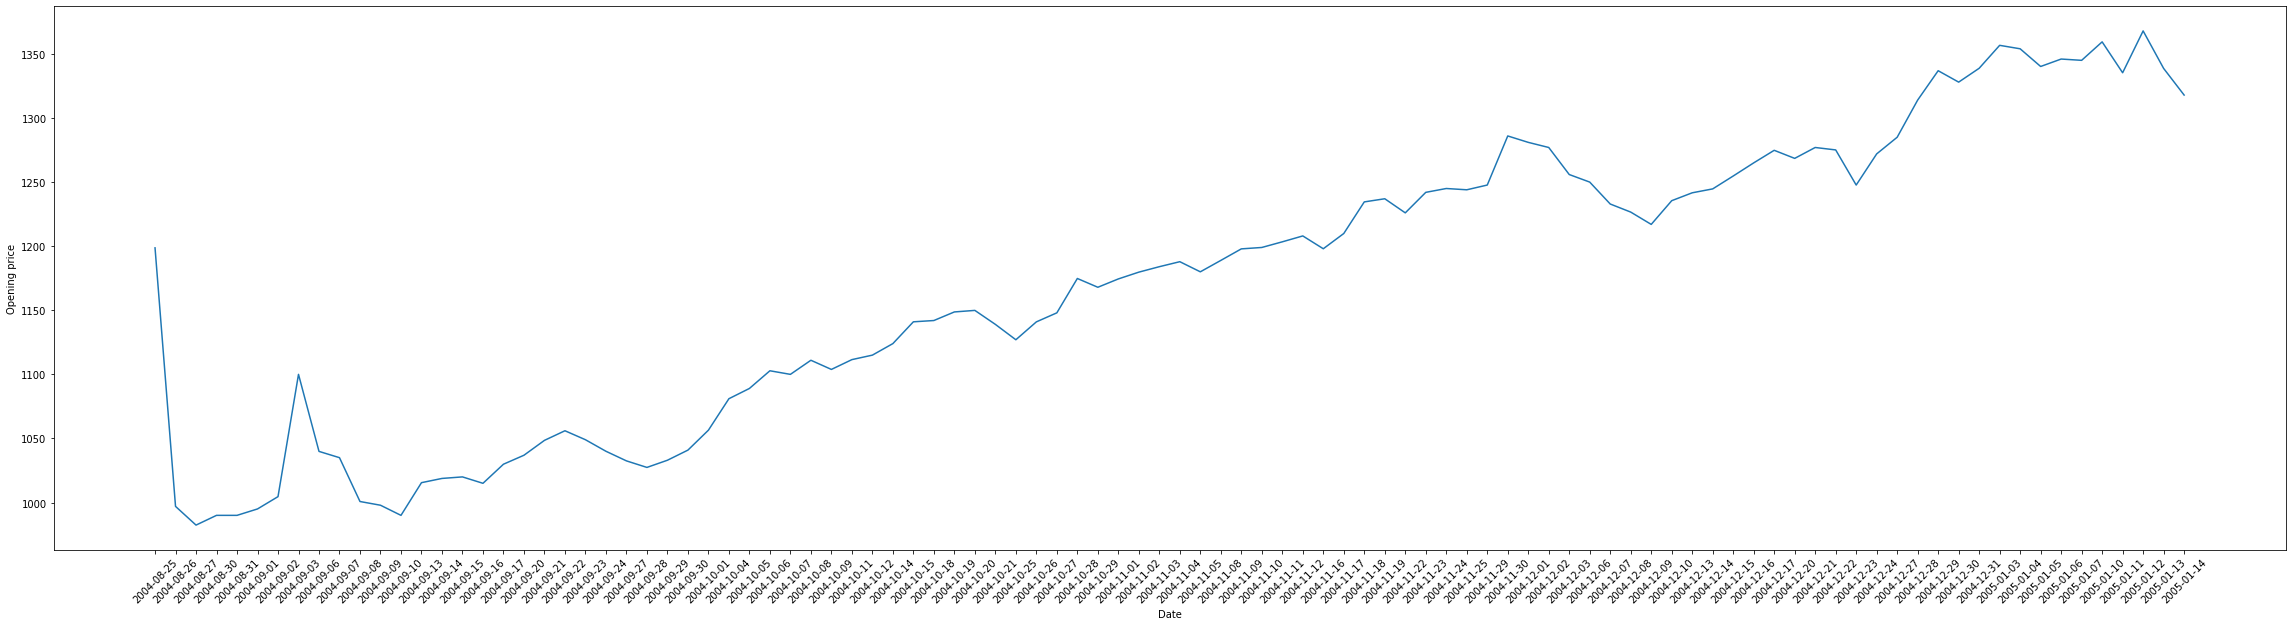

In [15]:
plt.figure(figsize=(40, 10))
plt.plot(df_100['Date'], df_100['High'])
plt.xlabel("Date")
plt.ylabel("Opening price")
plt.xticks(rotation = 45)
plt.show()

Interestingly stocks with maximum or mimimum change don't seem to do the same with their percentage change. A reason for this could be the gap between the opening and closing prices.

A look at the interested subset of the dataset for plotting the statistical distribution of the data.

In [16]:
df_100[{'Symbol','Open','High','Low'}].head()

,High,Symbol,Low,Open
0,1198.7,TCS,979.00,1198.7
1,997.0,TCS,975.30,992.0
2,982.4,TCS,958.55,982.4
3,990.0,TCS,965.00,969.9
4,990.0,TCS,976.00,986.5


In [17]:
data = df_100['Average']
data = data.sort_values(ascending=True)
data

2      970.475
3      977.500
4      983.000
12     983.000
1      986.150
        ...   
97    1327.325
94    1328.825
95    1340.700
91    1343.575
90    1346.075
Name: Average, Length: 100, dtype: float64

Computing the width of histogram interval

In [18]:
r = data.max()-data.min() # The range for the histogram plot
n = np.sqrt(100) # The number of bins
w = r/n # The width of the bar
print("The width of the bar is :",w)

The width of the bar is : 37.56000000000002


Plotting the histogram

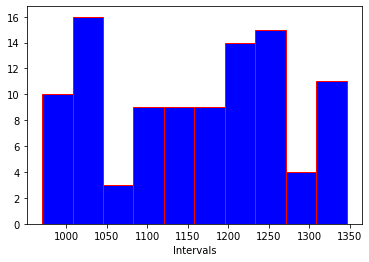

In [19]:
colors = ['green', 'blue', 'lime']
plt.hist(data, int(n), color='blue',ec='red')
plt.xlabel("Intervals")
plt.show()

Now we will plot the PDF(Probabilty Distribution Function) and CDF(Cummulative Distribution Function) using the data from first 100 days.

We will use the CLT, or central limit theorem, to roughly estimate our data to a Normal Distribution since we don't know the precise nature of its distribution beforehand and only have 100 sample means.

Plotting the normal distribution. As CLT dictates, the PDF of the sample means shall follow normal distribution.

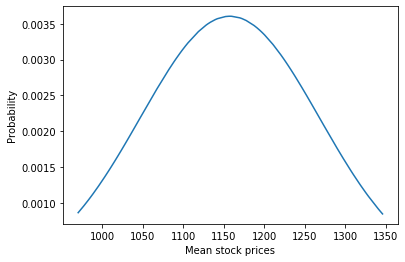

In [20]:
from scipy.stats import norm
m = data.mean() # Find the sample mean
v = data.var()  # Find the sample variance
plt.plot(data, norm.pdf(data, m, np.sqrt(v))) # Plot the normal distribution
plt.xlabel("Mean stock prices")
plt.ylabel("Probability")
plt.show()

Now Plot the CDF of the same sample data.

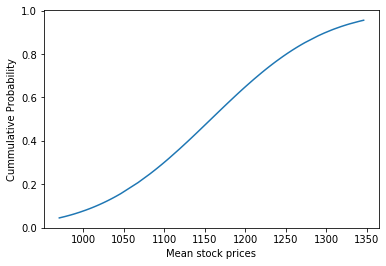

In [21]:
plt.plot(data, norm.cdf(data, m, np.sqrt(v)))
plt.xlabel("Mean stock prices")
plt.ylabel("Cummulative Probability")
plt.show()

Conclusion : We can clearly see that both the PDF and CDF follow normal distribution to a great extent.